#Space Titanic Competition

In [ ]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=01cf9d20145d84e998f1439e1cabf274eece30d92a4442d0557c00abdedd8a19
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e6

Imports

In [ ]:
#Initial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport

#Preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#Algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Metrics
from sklearn.metrics import accuracy_score

Read train dataset

In [ ]:
dataset = pd.read_csv('train.csv')
dataset.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
dataset.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
dataset.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
dataset.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

#Exploratory Data Analysis (EDA)


Variáveis CATEGÓRICAS

In [ ]:
dataset.shape

(8693, 14)

Age

<Axes: >

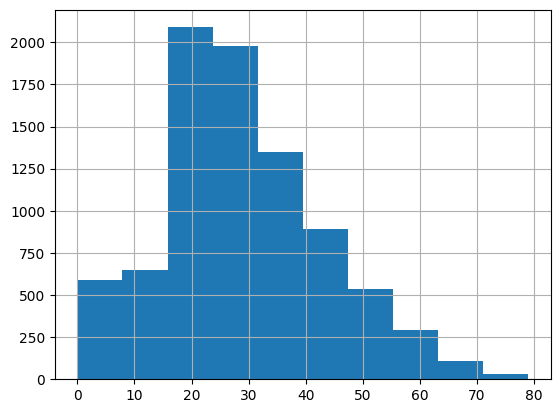

In [ ]:
dataset['Age'].hist()



RoomService

(0.0, 5000.0)

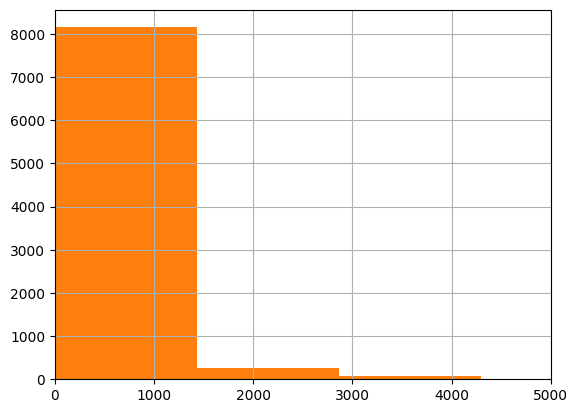

In [ ]:
dataset['RoomService'].hist()

plt.hist(dataset['RoomService'])
plt.xlim(0,5000)

FoodCourt

(0.0, 15000.0)

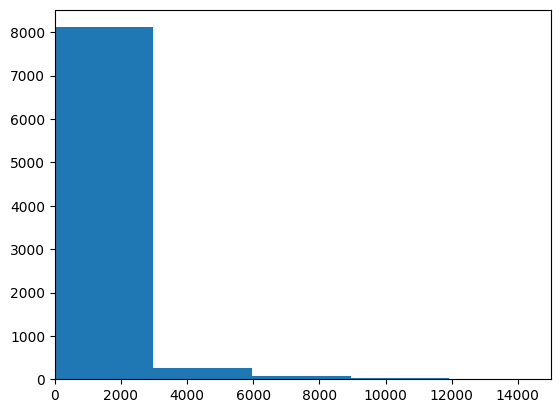

In [ ]:

plt.hist(dataset['FoodCourt'])
plt.xlim(0,15000)

ShoppingMall

(0.0, 5000.0)

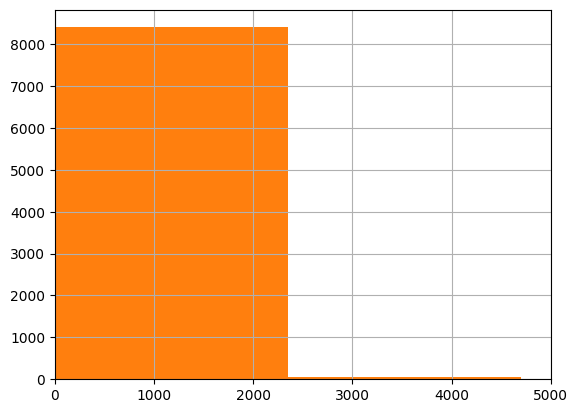

In [ ]:
dataset['ShoppingMall'].hist()

plt.hist(dataset['ShoppingMall'])
plt.xlim(0,5000)

Spa

(0.0, 10000.0)

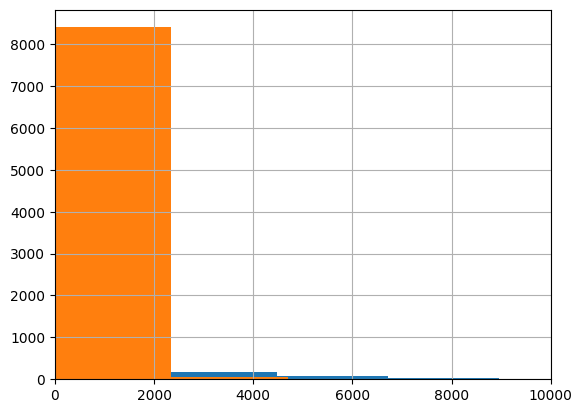

In [ ]:
dataset['Spa'].hist()

plt.hist(x=dataset['ShoppingMall'])
plt.xlim(0,10000)

In [ ]:
px.histogram(data_frame= dataset,x='Transported',text_auto=True)

Destination

In [ ]:
px.histogram(data_frame= dataset,x='Destination',text_auto=True,color='Transported',barmode='group')

In [ ]:
px.histogram(data_frame= dataset,x='VIP',text_auto=True,color='Transported',barmode='group')

In [ ]:
px.histogram(data_frame= dataset,x='HomePlanet',text_auto=True,color='Transported',barmode='group')

In [ ]:
px.histogram(data_frame= dataset,x='CryoSleep',text_auto=True,color='Transported',barmode='group')

In [ ]:
px.histogram(data_frame= dataset,x='Cabin',text_auto=True,color='Transported',barmode='group')

Variáveis NUMÉRICAS

In [ ]:
px.box(dataset,x= 'Age',color='Transported') #Box plots são parecidos

In [ ]:
dataset['Age'].isna().sum()

179

In [ ]:
dataset.isna().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [ ]:
dataset.isna().sum().sum()

2324

In [ ]:
2324/dataset.shape[0]  #26% of the data is NaN

0.2673415391694467

In [ ]:
dataset['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
dataset['CryoSleep'].value_counts() #Use LabelEncoder

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [ ]:
dataset['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
dataset['VIP'].value_counts() #Use LabelEncoder

False    8291
True      199
Name: VIP, dtype: int64

#Analyzing NaNs

In [ ]:
dataset['HomePlanet'].replace(to_replace='Europa',value='Earth',inplace=True)  #Replacing 'Europa' by 'Earth' in the dataset

In [ ]:
dataset['HomePlanet'].astype(object)

0       Earth
1       Earth
2       Earth
3       Earth
4       Earth
        ...  
8688    Earth
8689    Earth
8690    Earth
8691    Earth
8692    Earth
Name: HomePlanet, Length: 8693, dtype: object

In [ ]:
dataset['HomePlanet'].value_counts()

Earth    6733
Mars     1759
Name: HomePlanet, dtype: int64

In [ ]:
dataset['Group']= dataset['PassengerId'].apply(lambda a:a[:4])

In [ ]:
dataset.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group
0,0001_01,Earth,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Earth,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003


In [ ]:
dataset['Group'] = dataset['Group'].astype(int)


In [ ]:
dataset.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group
0,0001_01,Earth,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2
2,0003_01,Earth,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3
3,0003_02,Earth,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4


#EDA OneHot Features

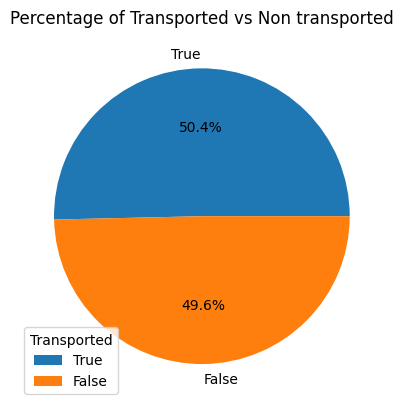

In [ ]:
transformed= dataset['Transported'].value_counts()

plt.pie(transformed,labels=transformed.index,autopct="%1.1f%%")
plt.legend(title='Transported')
plt.title("Percentage of Transported vs Non transported")

plt.show()

In [ ]:
# ['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Group','TotalSpend'])

In [ ]:
dataset.groupby(['VIP','Group'])['VIP'].value_counts()

VIP    Group  VIP  
False  1      False    1
       2      False    1
       3      False    1
       4      False    1
       5      False    1
                      ..
True   9158   True     1
       9194   True     1
       9197   True     1
       9230   True     1
       9276   True     1
Name: VIP, Length: 6207, dtype: int64

<ipython-input-40-b628b1c97c7f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

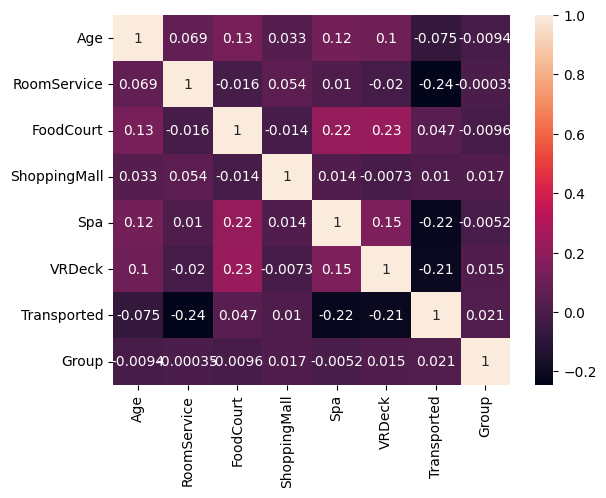

In [ ]:
sns.heatmap(dataset.corr(),annot=True) #annot= True , valores

In [ ]:
dataset['TotalSpend']=dataset['RoomService']+dataset['FoodCourt']+dataset['VRDeck']+dataset['Spa']+dataset['ShoppingMall']

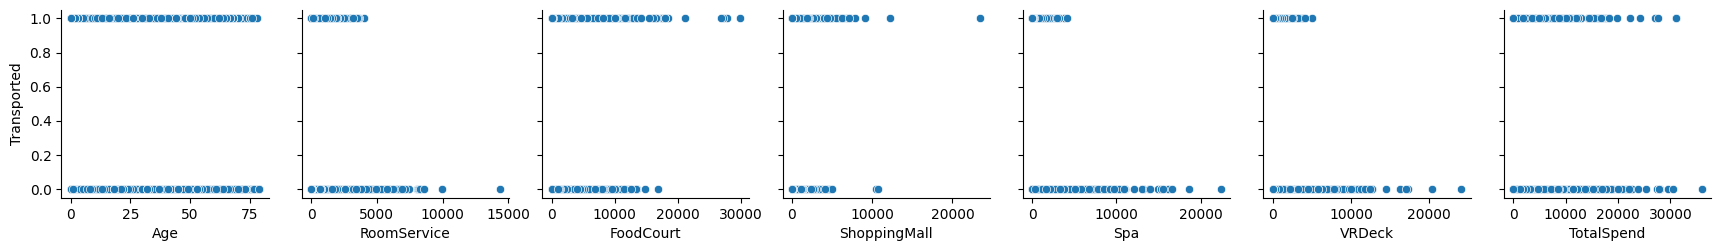

In [ ]:
sns.pairplot(dataset,y_vars='Transported',x_vars=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend'])

In [ ]:
dataset.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,TotalSpend
0,0001_01,Earth,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,736.0
2,0003_01,Earth,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,10383.0
3,0003_02,Earth,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1091.0


<Axes: >

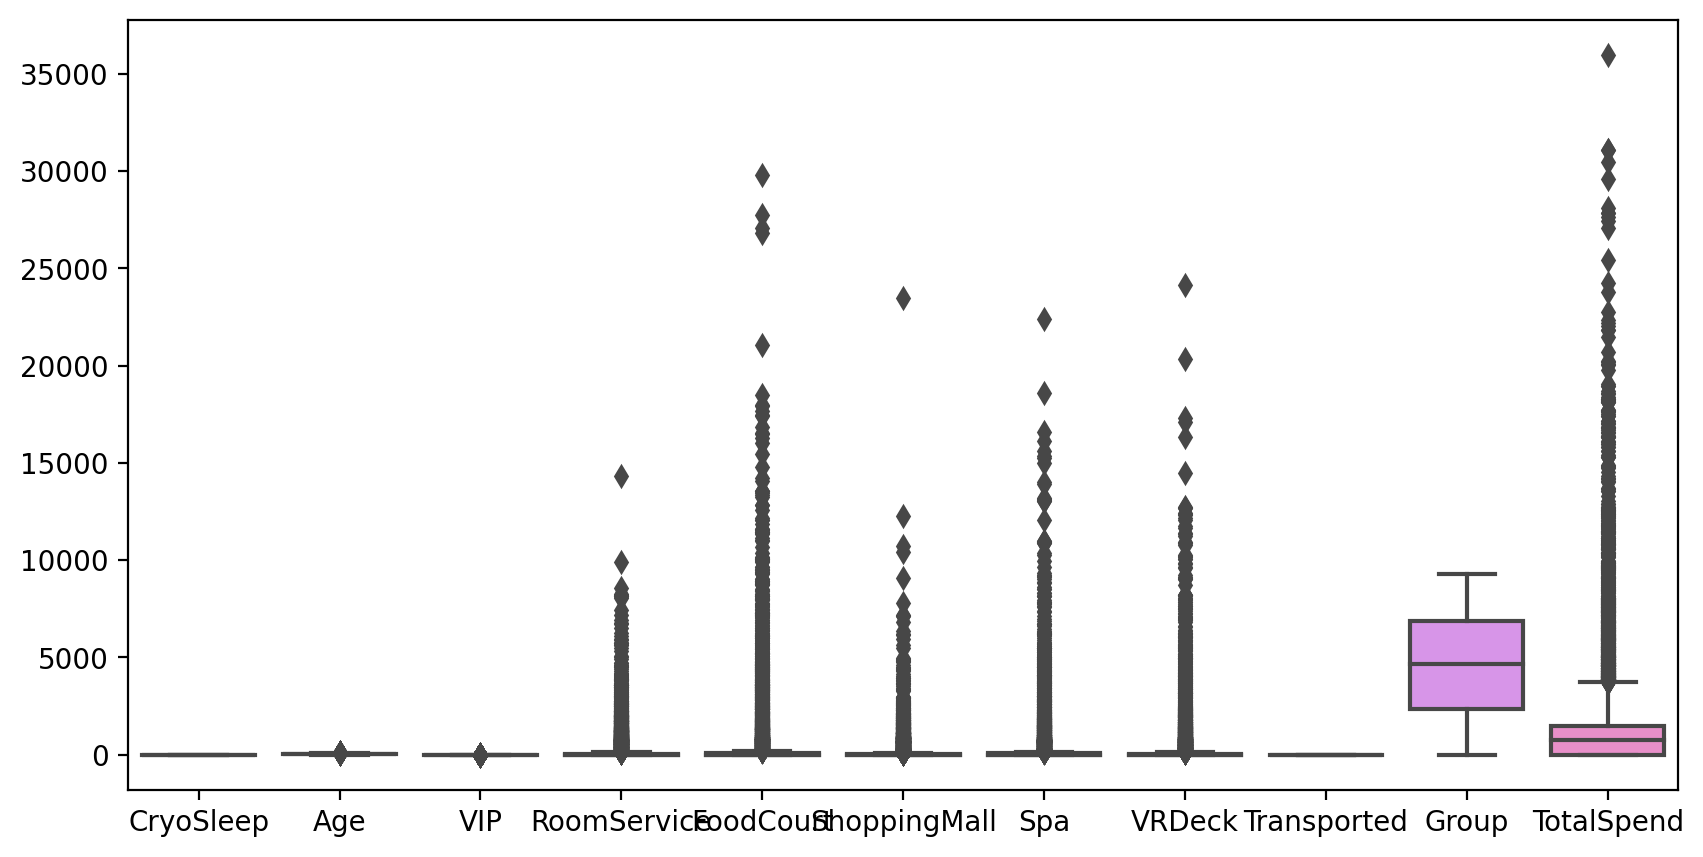

In [ ]:
plt.figure(figsize=(10,5),dpi=200)
sns.boxplot(data=dataset)

In [ ]:
m3sd = dataset.mean()+ 3* dataset.std()
m3sd

<ipython-input-45-8214be32857c>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-45-8214be32857c>:1: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Age                72.294995
CryoSleep           1.796899
FoodCourt        5292.544924
Group           12646.476191
PassengerId              NaN
RoomService      2224.840606
ShoppingMall     1987.818545
Spa              3721.255382
TotalSpend      10020.466264
Transported         2.003670
VIP                 0.477349
VRDeck           3742.006358
dtype: float64

In [ ]:
m3sd['Age']

72.29499473919168

In [ ]:
profile= ProfileReport(df=dataset,title='Overview')

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dataset.isnull().sum()

#Checking HomePlanet

In [ ]:
abc = dataset[dataset['HomePlanet'].isnull()]

abc

In [ ]:
sns.heatmap(abc.corr(),annot=True)

#Analyzing Outliers mean +-3sd

In [ ]:
a = dataset[dataset['Age']>m3sd['Age']]
display(a)

<Axes: xlabel='Transported', ylabel='TotalSpend'>

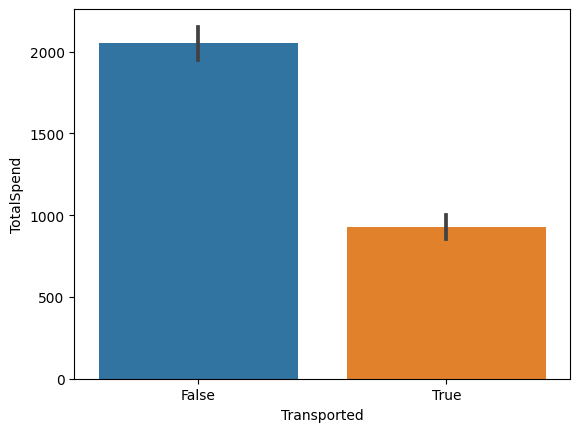

In [ ]:
sns.barplot(dataset,x='Transported',y='TotalSpend')

In [ ]:
dataset['Name'] = dataset['Name'].astype(object)

In [ ]:
dataset['FL'] = dataset['Name'].astype(str).apply(lambda a:a[0])

In [ ]:
dataset.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,TotalSpend,FL
0,0001_01,Earth,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0.0,M
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,736.0,J
2,0003_01,Earth,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,10383.0,A


In [ ]:
dataset['FL'].value_counts()

A    920
S    656
C    642
M    578
T    504
B    494
E    467
G    462
D    444
L    433
J    404
R    345
H    344
W    298
P    294
K    259
N    216
F    211
n    200
I    164
V    133
O     82
Z     60
Y     44
Q     22
U     17
Name: FL, dtype: int64

In [ ]:
sns.barplot(dataset,x='Transported',y='FL')

In [ ]:
dataset['FL'].value_counts()

In [ ]:
sns.histplot(data=dataset,x='TotalSpend')

In [ ]:
dataset[dataset['TotalSpend']==0]

In [ ]:
3247/dataset.shape[0]  # % of NaNs TotalSpend

In [ ]:
dataset['Group'].value_counts()

In [ ]:
sns.heatmap(dataset.corr())

In [ ]:
le = LabelEncoder()
dataset['Transported']=le.fit_transform(dataset['Transported'])

In [ ]:
dataset.head(5)

In [ ]:
dataset.head(5)

#Dropping all NAs - First Inspection in the DF- see algorithm prediction power

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset['CryoSleep'] = le.fit_transform(dataset['CryoSleep'])

In [ ]:
dataset['VIP'] = le.fit_transform(dataset['VIP'])


In [ ]:
dataset['HomePlanet']= le.fit_transform(dataset['HomePlanet'])


In [ ]:
dataset.head(5)

In [ ]:
dataset[['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','Group','TotalSpend','FL','Transported']]

In [ ]:
dataset['HomePlanet'].astype(str)

In [ ]:
dataset.info()

#Dropar Colunas

In [ ]:
dataset.drop(['Cabin','Destination','Name','FL'],axis=1,inplace=True)

In [ ]:
dataset

In [ ]:
dataset = dataset[['PassengerId','HomePlanet','CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Group','TotalSpend','Transported']]

In [ ]:
dataset.head(5)

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,TotalSpend,Transported
0,0001_01,0,0,0.695413,0,-0.345756,-0.285355,-0.309494,-0.273759,-0.269534,1,-0.523440,0
1,0002_01,0,0,-0.336769,0,-0.176748,-0.279993,-0.266112,0.206165,-0.230494,2,-0.266133,1
2,0003_01,0,0,2.002842,1,-0.279083,1.845163,-0.309494,5.596357,-0.226058,3,3.106470,0
3,0003_02,0,0,0.282540,0,-0.345756,0.479034,0.334285,2.636384,-0.098291,3,1.286096,0
4,0004_01,0,0,-0.887266,0,0.124056,-0.243650,-0.047470,0.220152,-0.267759,4,-0.142025,1


In [ ]:
X = dataset.drop('Transported',axis=1)
y = dataset['Transported']

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

X.dtypes

PassengerId       int64
HomePlanet        int64
CryoSleep         int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Group             int64
TotalSpend      float64
dtype: object

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

PassengerId    0.693121
CryoSleep      0.113526
VRDeck         0.063446
Age            0.009652
Name: MI Scores, dtype: float64

#Dataset X and Y

In [ ]:
# X = dataset.iloc[:,:-1].values

# y = dataset.iloc[:,-1].values

In [ ]:
X=dataset.drop(['Transported'],axis=1)
y=dataset['Transported']

In [ ]:
X

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')

# X= np.array(ct.fit_transform(X)) #X must be array... fit train,model..

In [ ]:
sc= StandardScaler()
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
X_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend']]= mm.fit_transform(X_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend']])

# X_train[['Age']]=sc.fit_transform(X_train[['Age']])

X_test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend']]= mm.transform(X_test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend']])

In [ ]:
X_train

SVC

In [ ]:
sv= SVC()
sv.fit(X_train,y_train)

In [ ]:
y_pred = sv.predict(X_test)

In [ ]:
y_pred

In [ ]:
accuracy_score(y_test,y_pred)


In [ ]:
sv.score(X_test,y_test)

RandomForest

In [ ]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)


In [ ]:
rf.score(X_test,y_test)

#Comparing with DummyClassifier

In [ ]:
from sklearn.dummy import DummyClassifier

dc= DummyClassifier()

dc.fit(X=X_train,y= y_train)

In [ ]:
dc.score(X_test,y_test)

In [ ]:
# dataset[['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','Group','TotalSpend','FL','Transported']]

#DATASET2

In [ ]:
dataset2 = dataset.copy()

In [ ]:
dataset2.head(5)